In [30]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# reads the data from the file

df = pd.read_csv('/Users/kaidenjones/Desktop/localify_lab4_data.tsv', sep='\t')
# df = pd.read_csv('/Users/cymoar/COMP-ML/Labs/ML-Lab4/localify_music_genre-song_dataset_short_limited.tsv', sep='\t')

# Slpits the data into training and validation data
df_training = df.iloc[:8000]
df_validation = df.iloc[8000:]

# spit the data into labels, X, y
training_label_df = df_training[['song_name','artist_name']]
tensor_label = tf.convert_to_tensor(training_label_df)
training_X_df = df_training[['acousticness','danceability','energy','instrumentalness',
                             'liveness','loudness','speechiness','tempo','valence']]
tensor_training_X = tf.convert_to_tensor(training_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_training_y = tf.convert_to_tensor(training_y_df[['Unnamed: 12']], dtype=tf.float32)
tty2 = tf.convert_to_tensor(training_y_df[['Unnamed: 12']])
vector_y = tf.reshape(tty2, [8000])

validation_label_df = df_validation[['song_name','artist_name']]
validation_X_df = df_validation[['acousticness','danceability','energy','instrumentalness','liveness',
                                 'loudness','speechiness','tempo','valence']]
validation_y_df = df_validation[['genre_name','Unnamed: 12']]

tensor_validation_X = tf.convert_to_tensor(validation_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_validation_y = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']], dtype=tf.float32)
tvy2 = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']])
validation_vector_y = tf.reshape(tvy2, [2000])

In [64]:
# Model archecture
# model = Sequential([
#     Dense(units=25, activation="relu"),
#     Dense(units=15, activation="relu"),
#     Dense(units=10 , activation="linear")])

new_lambda_value = .0001

# model = Sequential([
#     Dense(units=10, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

# model = Sequential([
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

model = Sequential([
    Dense(units=100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=100, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

In [65]:
# gets the loss
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [66]:
# makes the model fit
class_weights = {
    0: 1.0,
    1: 1.0,   
    2: 1.0,
    3: 1.0,
    4: 1.2,   
    5: 1.0,
    6: 1.0,
    7: 1.0,   
    8: 1.0,
    9: 1.0
}

model.fit(tensor_training_X, tensor_training_y, epochs=250, class_weight=class_weights)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.1305 - loss: 3.0879
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.1551 - loss: 2.2620
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.1624 - loss: 2.2305
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.1908 - loss: 2.2028
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.1846 - loss: 2.2089
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.1857 - loss: 2.1894
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.1957 - loss: 2.1799
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.2103 - loss: 2.1540
Epoch 9/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.2261 - loss: 2.1362
Epoch 10/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.2338 - loss: 2.1262
Epoch 11/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.2466 - loss: 2.0796
Epoch 12/250
250/25

In [67]:
# gets the predictions of the model
logits = model(tensor_training_X)
f_x = tf.nn.softmax(logits)

In [68]:
print(f_x)

tf.Tensor(
[[3.3355363e-02 7.1824208e-02 5.1482569e-02 ... 3.8571704e-02
  1.1705701e-02 1.3545823e-01]
 [2.3751657e-01 1.1812267e-01 1.5684765e-02 ... 5.5999830e-02
  2.5411525e-01 1.3211638e-02]
 [2.3465671e-01 1.3425221e-01 9.0373019e-03 ... 5.0523657e-02
  9.5533118e-02 3.0850029e-02]
 ...
 [1.5027118e-02 2.3227143e-01 1.4236326e-03 ... 3.8550233e-03
  4.9209753e-03 5.8731306e-02]
 [1.5492561e-01 2.1889189e-02 3.1370309e-04 ... 9.5051132e-02
  6.2117332e-01 2.7034851e-02]
 [1.3623053e-01 4.4173680e-02 1.7382933e-02 ... 3.9528880e-01
  3.0474094e-01 3.0284237e-02]], shape=(8000, 10), dtype=float32)


In [69]:
predictions = tf.argmax(f_x, axis=1)
sum_vector = tf.reduce_sum(predictions)

In [70]:
correct_predictions = tf.equal(predictions, vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(vector_y)

tf.Tensor([False False  True ...  True  True False], shape=(8000,), dtype=bool)
tf.Tensor(0.384, shape=(), dtype=float32)
tf.Tensor([0 0 0 ... 5 8 8], shape=(8000,), dtype=int64)


In [71]:
conf_matrix = tf.math.confusion_matrix(labels=vector_y, predictions=predictions)
print(conf_matrix)

tf.Tensor(
[[378 187  44  79 100  63  63  86 119  36]
 [114 432  30  92  57  72  44  24  17  62]
 [ 31  12 605  16   5  32  85  60   5   3]
 [116 184  14 262  20  55  28  21  28  12]
 [208 178  20  47 103  39  30  42  54  16]
 [ 79 123  79  74  27 184 130  58  11  38]
 [ 77  87 150  60  22 121 179  69   4  22]
 [135  28  71  36  20  40  54 312  35  35]
 [ 86  11  10  19  23  14  13  38 294  10]
 [ 29 141  14  38  13  61  30  40   3 323]], shape=(10, 10), dtype=int32)


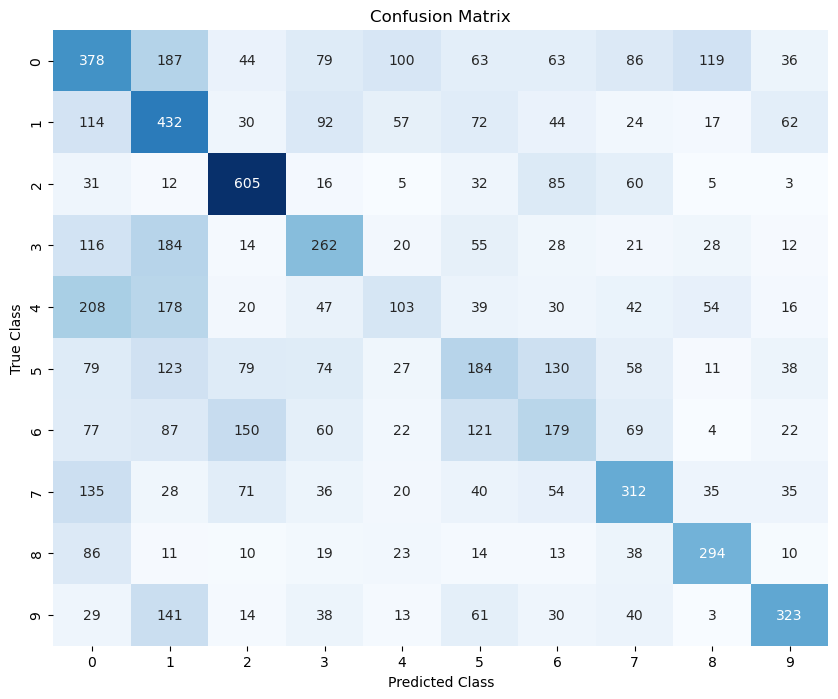

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [73]:
# testing the cross validation set:
logits = model(tensor_validation_X)
f_x = tf.nn.softmax(logits)

validation_predictions = tf.argmax(f_x, axis=1)

correct_predictions = tf.equal(validation_predictions, validation_vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(validation_vector_y)

tf.Tensor([ True  True False ... False False False], shape=(2000,), dtype=bool)
tf.Tensor(0.2845, shape=(), dtype=float32)
tf.Tensor([8 8 0 ... 6 6 6], shape=(2000,), dtype=int64)


In [74]:
conf_matrix = tf.math.confusion_matrix(labels=validation_vector_y, predictions=validation_predictions)
print(conf_matrix)

tf.Tensor(
[[103  62  15  34  16  42  21  32  55  25]
 [ 27  96   6  25  11  25  12   8   9  25]
 [  9   5  93   2   0   8  26  19   0   1]
 [ 39  46  10  26   5  19   9   6  10   6]
 [ 57  51   4  18  17  23  11  15  22  23]
 [ 14  33  29  25   5  50  23  18   4  12]
 [ 14  14  53  17   4  33  23  21   2  10]
 [ 22   2  12   1   2   3   8  49   2   4]
 [ 37   7   1  13   8  15   4   7  86   6]
 [  5  15   6   0   0   6   6  12   2  26]], shape=(10, 10), dtype=int32)


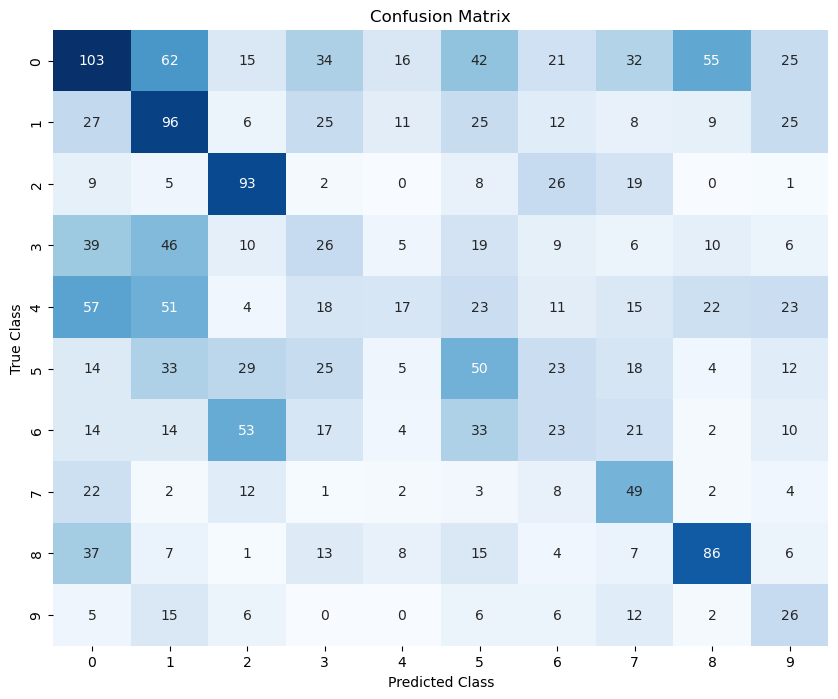

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()